# Course Enrollment

## Authors: Isaac, Conor, and Quoc

    The purpose of this notebook is to teach you, the user, how to use the code that we have spent the past year creating. The purpose of that code is to predict course enrollment for given quarters. What that means is that you can give our code a large amount of data, which we will teach you how to format and where to put it, and the code will learn the patterns of that code and predict the number of students that will take every class for the quarters that you wish to predict.

In [1]:
# This code block contains all necessary libraries needed to run the code
# Consult the README file to learn how to install the libraries on your machine
import pandas as pd
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt


# These are not libraries but our code, made to be run from only a few lines for clarity's sake
from curation import Curate
from create_datasets import Create_Data
from sklearn_trainer import load_data, evaluate_model, report_results, load_trained_model, sklearn_train
from model_representation import plot_results
from visualizations import Visualize

### Data Collection

In [2]:
# This is the data that we use to train our model
# Make sure your data is in this format and put the path to your data where data/WWU_course_info.csv is
# We got this from the Registrar's office
base_data = pd.read_csv('data/WWU_course_info.csv', encoding='ISO-8859-1')
base_data.head()

,TERM,CRN,SUBJECT,COURSE_NUMBER,TITLE,ACTUAL_ENROLL,CAPENROLL,PRIMARY_BEGIN_TIME,PRIMARY_END_TIME,U,M,T,W,R,F,S,PRIMARY_INSTRUCTOR_TENURE_CODE,CAMPUS
0,201510,10046,COMM,442,Video Workshop,12,16,1700.0,1820.0,NaN,NaN,T,NaN,R,NaN,NaN,NT,M
1,201510,10049,ENG,101,Writing and Critical Inquiry,24,24,830.0,950.0,NaN,M,NaN,NaN,NaN,F,NaN,NaN,M
2,201510,10052,ENG,101,Writing and Critical Inquiry,24,24,830.0,950.0,NaN,M,NaN,W,NaN,NaN,NaN,NaN,M
3,201510,10055,ECON,206,Intro to Microeconomics,60,60,1130.0,1250.0,NaN,M,NaN,W,NaN,F,NaN,NT,M
4,201510,10060,ENG,101,Writing and Critical Inquiry,24,24,1000.0,1120.0,NaN,M,NaN,NaN,NaN,F,NaN,NaN,M


### Curation

This class creates two seperate files, machine_learning_data.csv and visualization.csv.
Both are used for what the names imply, we will use the first to train our models and the 
second to create graphs and understand the data which we will see later in this document.

In [3]:
Curate.main(base_data)

This class takes the machine learning data created in the previous class and splits it up into smaller chunks
That way when training takes place it can randomize the quarters and train and test on them randomly which does better than in order

In [4]:
Create_Data()

### Machine Learning Training

The model variable below is one of our best sklearn models we were able to achieve it can be changed between mlp_regressor and random_forest. Make sure to put the model name in single brackets. <br>
Trainer runs a variety of files that gets the data made in Create_Data and trains it using the model chosen below. The main funcion returns variables necessary for other files to use, but not necessary for us to see which is why it is set to an underscore

In [5]:
model_filename = 'sklearn_model.joblib'
val_data_path, X_train, y_train, X_val, y_val = load_data()
model = load_trained_model(model_filename)
y_pred = evaluate_model(model, X_val)

Above, RMSE is the root mean squared error of the model, or the average number of students that the model was off by
R^2 score is a number on a scale from -1 to 1 that determines roughly how good the model is. .4 isnt great but fine, .6 is getting better
and .7 and above is about where we want to be

### Visualization

First we have a representation of the quality of the model
</br>
The first graph shows the top 25 differences between a value's truth and it's predicted value.
</br>
The second graph compares the values again but this time agianst each other. Ideally, all points would lie on the line y=x since they would be the same, but this graph nicely shows the differences between the two.

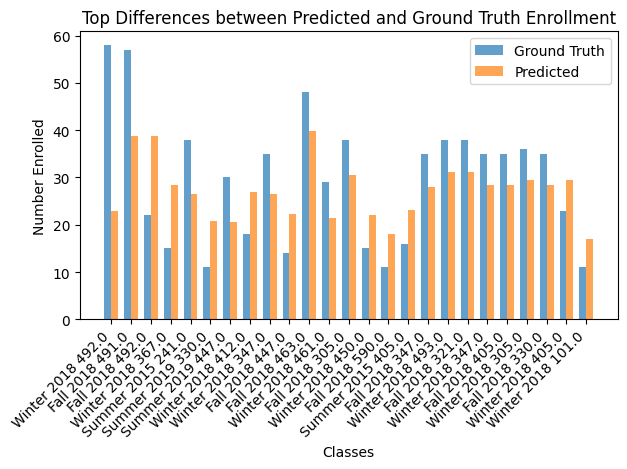

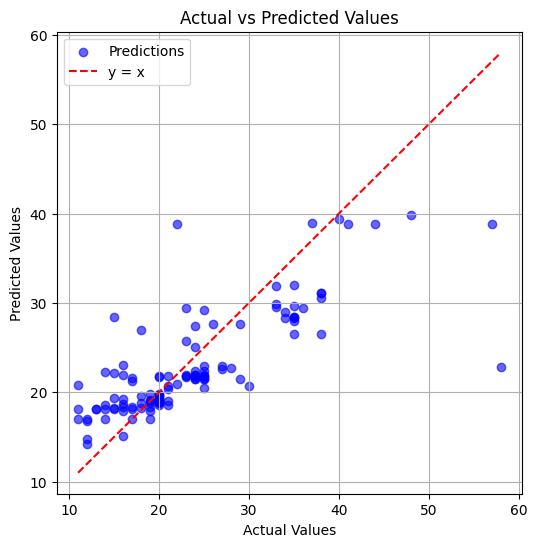

In [7]:
plot_results()

This gives three very important metrics, RMSE is the average distance between the actualy score and the tested one, or difference between predicted students and the actual number in that class. </br> The second value is a little technical but essentially, the closer that number is to 1, the better. </br> The last is a table that shows the actual number of students in a class and the number that was predicted

In [8]:
report_results(y_val, y_pred)

Validation RMSE: 5.85
R² Score: 0.59
     Actual  Predicted
0        35  26.556795
1        35  28.299349
2        24  25.057117
3        20  19.687766
4        20  19.173667
..      ...        ...
112      11  20.765163
113      17  18.406029
114      12  14.791534
115      30  20.661681
116      25  20.445182

[117 rows x 2 columns]


The last graph is a graph that shows you what your data looks like.</br> Each color is a different year and each row is a different class in that year. They are all the same quarter.

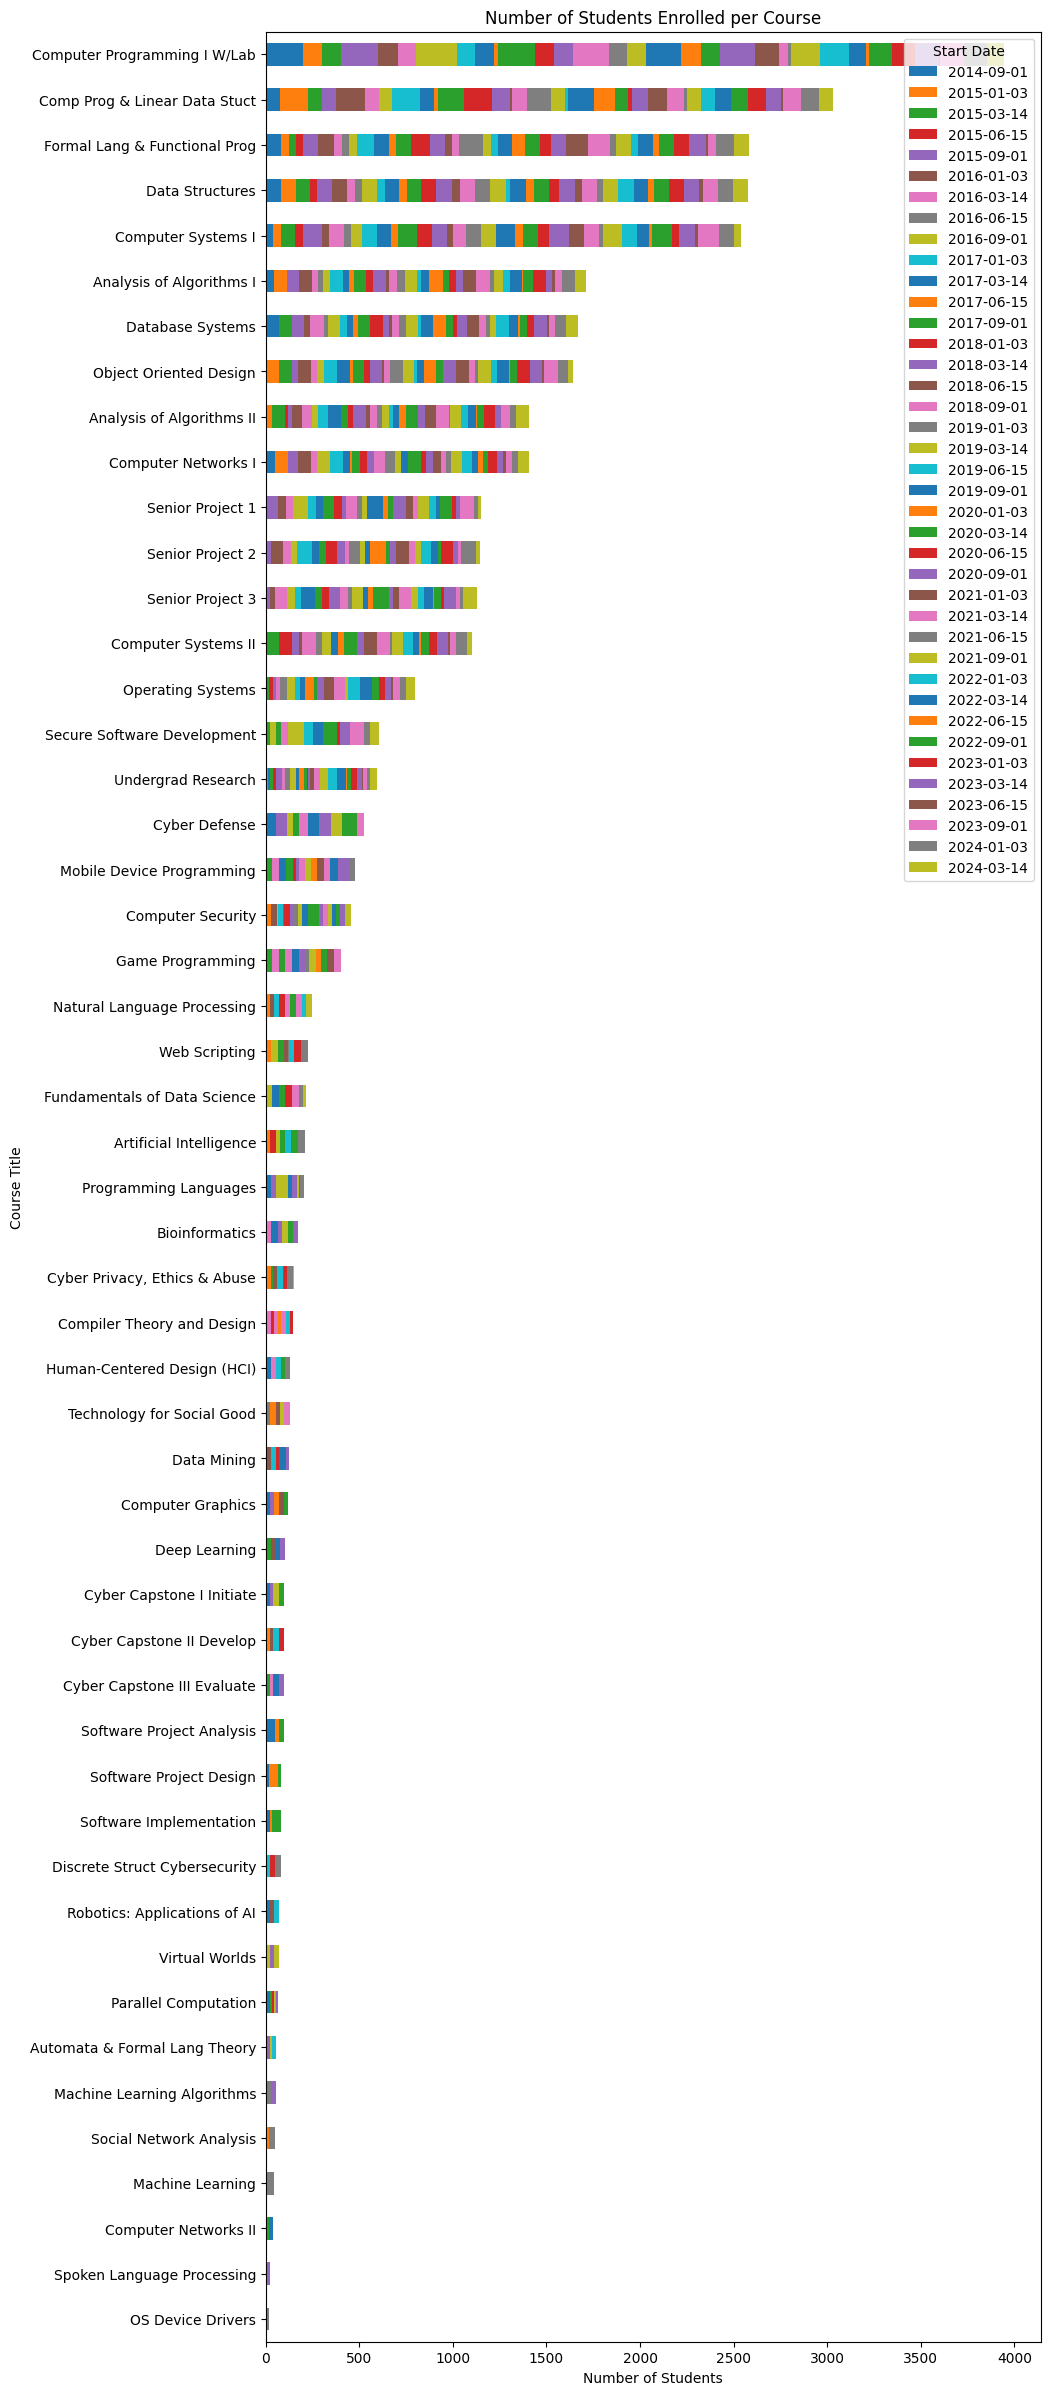

In [9]:
Visualize.main()